<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [54]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [4]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 7000)
start, end

(datetime.datetime(2005, 8, 30, 17, 48, 45, 533186),
 datetime.datetime(2024, 10, 29, 17, 48, 45, 533186))

In [5]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [6]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                     Adj Close                               Close  \
Ticker                         AAPL       MSFT      NVDA TSLA      AAPL   
Date                                                                      
2005-08-30 00:00:00+00:00  1.404543  19.074242  0.229363  NaN  1.663214   
2005-08-31 00:00:00+00:00  1.414195  19.214592  0.234485  NaN  1.674643   
2005-09-01 00:00:00+00:00  1.395194  19.088274  0.234561  NaN  1.652143   
2005-09-02 00:00:00+00:00  1.393987  18.961950  0.230739  NaN  1.650714   
2005-09-06 00:00:00+00:00  1.471799  18.947922  0.232650  NaN  1.742857   

Price                                                    High             ...  \
Ticker                          MSFT      NVDA TSLA      AAPL       MSFT  ...   
Date                                                                      ...   
2005-08-30 00:00:00+00:00  27.180000  0.250083  NaN  1.671071  27.230000  ...   
2005-08-31 00:00:00+00:00  27.379999  0.255667  NaN  1.679643  27.440001  ...   
2005-09-01 00:00:00+00:00  27.200001  0.255750  NaN  1.684643  27.389999  ...   
2005-09-02 00:00:00+00:00  27.020000  0.251583  NaN  1.671429  27.270000  ...   
2005-09-06 00:00:00+00:00  27.000000  0.253667  NaN  1.745714  27.290001  ...   

Price                           Low           Open                            \
Ticker                         NVDA TSLA      AAPL       MSFT      NVDA TSLA   
Date                                                                           
2005-08-30 00:00:00+00:00  0.240667  NaN  1.642500  27.059999  0.241000  NaN   
2005-08-31 00:00:00+00:00  0.248750  NaN  1.673571  27.170000  0.249500  NaN   
2005-09-01 00:00:00+00:00  0.253583  NaN  1.678571  27.379999  0.254917  NaN   
2005-09-02 00:00:00+00:00  0.250750  NaN  1.653571  27.209999  0.256250  NaN   
2005-09-06 00:00:00+00:00  0.248667  NaN  1.667857  27.059999  0.252500  NaN   

Price                         Volume                            
Ticker                          AAPL      MSFT       NVDA TSLA  
Date                                                            
2005-08-30 00:00:00+00:00  518761600  55163200  948852000  NaN  
2005-08-31 00:00:00+00:00  402956400  65210200  906804000  NaN  
2005-09-01 00:00:00+00:00  356367200  75974500  556884000  NaN  
2005-09-02 00:00:00+00:00  222378800  52047500  469800000  NaN  
2005-09-06 00:00:00+00:00  818619200  46089000  423096000  NaN  

[5 rows x 24 columns]

In [7]:
df.index

DatetimeIndex(['2005-08-30 00:00:00+00:00', '2005-08-31 00:00:00+00:00',
               '2005-09-01 00:00:00+00:00', '2005-09-02 00:00:00+00:00',
               '2005-09-06 00:00:00+00:00', '2005-09-07 00:00:00+00:00',
               '2005-09-08 00:00:00+00:00', '2005-09-09 00:00:00+00:00',
               '2005-09-12 00:00:00+00:00', '2005-09-13 00:00:00+00:00',
               ...
               '2024-10-16 00:00:00+00:00', '2024-10-17 00:00:00+00:00',
               '2024-10-18 00:00:00+00:00', '2024-10-21 00:00:00+00:00',
               '2024-10-22 00:00:00+00:00', '2024-10-23 00:00:00+00:00',
               '2024-10-24 00:00:00+00:00', '2024-10-25 00:00:00+00:00',
               '2024-10-28 00:00:00+00:00', '2024-10-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4824, freq=None)

In [8]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [9]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
2005-08-30 00:00:00+00:00,1.663214,27.180000,0.250083,NaN
2005-08-31 00:00:00+00:00,1.674643,27.379999,0.255667,NaN
2005-09-01 00:00:00+00:00,1.652143,27.200001,0.255750,NaN
2005-09-02 00:00:00+00:00,1.650714,27.020000,0.251583,NaN
2005-09-06 00:00:00+00:00,1.742857,27.000000,0.253667,NaN


In [10]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,4824.000000,4824.000000,4824.000000,3609.000000
mean,53.400017,108.329170,9.815399,78.171280
std,61.551816,115.365113,22.368154,103.522794
min,1.650714,15.150000,0.147500,1.053333
25%,9.035178,28.270000,0.381000,11.906000
50%,25.742499,46.090000,0.674875,17.694668
75%,67.735622,156.427502,6.573875,173.789993
max,236.479996,467.559998,143.710007,409.970001


<Axes: xlabel='Date'>

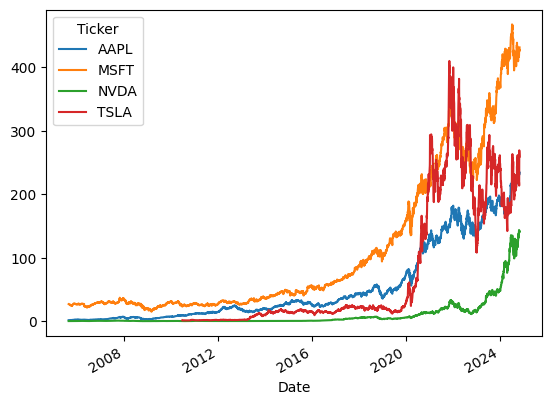

In [11]:
Close.plot()

# Twitter Data Collection
https://www.youtube.com/watch?v=AFeXivA7Hh4

In [12]:
#following this tutorial https://www.youtube.com/watch?v=AFeXivA7Hh4
import requests
import pandas as pd


In [13]:
twitter_data = []

In [58]:
%%time
from google.colab import userdata
import requests
import pandas as pd
# Retrieve the 'twitter_api_key' secret from Colab
twitter_api_key = userdata.get('twitter_api_key')


payload = {
    'api_key': twitter_api_key,
    'query':'Stock',
    'num': '100'

}
response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)

# Check the response status code
if response.status_code == 200:
  data = response.json()
  # Proceed with processing the JSON data
else:
  print(f"Error: Request failed with status code {response.status_code}")
  print(response.text) # Print the response content to see the error message

CPU times: user 48.8 ms, sys: 4.24 ms, total: 53 ms
Wall time: 5.06 s


In [15]:
data

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "Boot Barn stock slides after CEO departure announcement, but Western-wear ... Nvidia's stock is up nearly 200% this year, and a critical time for tech\xa0...",
   'highlighs': ['stock', 'stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Stocktwits',
   'snippet': '$DJT is up 15.28% today, now up 40.4% in a week Great call out by @PeloSwing on Stocktwits Stock is up 88.60% since post on October 10th Show him some love!',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stocktwits',
   'displayed_link': '1M+ followers'},
  {'position': 2,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸',
   'highlighs': ['

# Reddit Data Collection

https://www.youtube.com/watch?v=8KrUCXlAN4Q

In [16]:
!pip install praw
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 6.8 MB/s eta 0:00:00


In [17]:
import praw
import asyncpraw
import asyncio
from datetime import datetime, timedelta

In [18]:
reddit = praw.Reddit(client_id='pY3DRqwGM2HOIsepjKe3tg',
                     client_secret='qHWhNgd3AsLI6R7jiqHNiowS37PZyQ',
                     user_agent='StockBot')

In [19]:

%%time
subreddit = reddit.subreddit('wallstreetbets')

for post in subreddit.hot(limit=10):
    print(f"Title: {post.title}")
    # print(f"Content: {post.selftext}")
    print(f"Author: {post.author}")
    print(f"Upvotes: {post.score}")
    print(f"Comments: {post.num_comments}")
    print(f"URL: {post.url}")
    # print('-' * 80)
    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        print(comment.body)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Daily Discussion Thread for October 29, 2024
Author: wsbapp
Upvotes: 85
Comments: 5694
URL: https://www.reddit.com/r/wallstreetbets/comments/1gequxw/daily_discussion_thread_for_october_29_2024/


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



There's a new sheriff in town... And his name is election gambling ![img](emote|t5_2th52|4271)
Today I learned that the real fountain of youth is having 43,000 shares of NVDA with a cost basis of $5.18![img](emote|t5_2th52|4260)![img](emote|t5_2th52|4267)![img](emote|t5_2th52|4271)
30 mins until I get inevitably fucked by SOFI again for the 8th time
DJT has 800K active users

Twitter has **586 million** active users

Valuation? Same ![img](emote|t5_2th52|4271)Not sure what level of regardation this market is pricing for but it will come back to earth. Make sure to get out in time.
selling DJT shares at 84% gain, good luck to yall who remain ![img](emote|t5_2th52|8882)
Have you guys heard of djt? It's pretty under the radar and nobody seems to be talking about it
DJT moving so hard, this is a generational bagholding event ![img](emote|t5_2th52|4267)![img](emote|t5_2th52|4271)
DJT cured cancer ![img](emote|t5_2th52|4276)
SOFI beats earning projection by 25%, drops 10% in 30 minutes. WTF?

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



If this comment reaches ~~20~~ ~~30~~ ~~40~~ 200 upvotes, I'll full port on PayPal
Monday - TransMedics calls

Tuesday - Alphabet calls 

Thursday - Uber and Amazon calls ![img](emote|t5_2th52|29637)![img](emote|t5_2th52|18630) 

Friday - Wendy's application ![img](emote|t5_2th52|52627)
Monday: nothing 

Tuesday: sell AMDL and Google shares after hours, about 15% and 10% gain, respectively. Buy lilly 2x ETF with gains

Wednesday morning: sell lilly 2xetf for about 11.5% gain Close out Google leaps for roughly 93% gain
Close Google weeklies for about 230% gain

Wednesday after hours: close meta shares for about 8% gain


Do not play Microsoft 

All in on Uber after hours Wednesday when it touches 76.38 a share

Sell Uber Thursday for 10% gain

Don't add to Amazon position, sell at 202 a share


Don't play apple


It is literally this easy, I will make roughly 348,000 dollars

Edit: I forgot a decimal. I will make 348.00 dollars
https://preview.redd.it/cruuutfoz0xd1.jpeg?width=736&format

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Please stop reporting post. Man was collecting dividends in 2018… his cost basis is real

https://preview.redd.it/29zqqulh6pxd1.jpeg?width=1280&format=pjpg&auto=webp&s=e4330982f3aaa6716e5e3a93514eab77cf14d60b
That cost basis is hot
Wow that’s fucking wild. I would literally dump that entire nvda position, pay my gay ass taxes and tell my bosses to go fuck themselves in about t minus 30 min
#DID YOUR GRANDMA COME BACK TO LIFE?
Hey dad, it's me. Mom said you left to get milk but you must have forgotten our address. Please come home, we miss you. ![img](emote|t5_2th52|52627)
New caption: Dude is on Reddit for 6 years, makes 2 comments in 6 years, and then posts $6mm NVDA position
https://preview.redd.it/2o3wkd121pxd1.jpeg?width=388&format=pjpg&auto=webp&s=0d3ab1de743bf7c3a4f814cd4e7f1605e3930488
I don’t believe in my marriage as much as you believe in that stonk. Jesus.
Man, fuck this post. 😭😭
Step one have over 200k to put into one stock hundreds of years ago
Can you record yourself sell

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 2 years ago
**Total Comments** | 5 | **Previous Best DD** | 
**Account Age** | 11 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
iCrash.
It's wireless too, now.
Of all the places I expected to see the tram crash referenced, I didn’t expect it to be WSB.

Maybe r/tollbugatabets.
Careful. People here will actually believe this…
iTram. Currently available only in Europe
Average apple hardware after new update
Must have an old version of google maps.
They'll fix it in the next version
It wants to take you to the nearest Apple store. Genius!
OP is tesla bootlicker
I didn’t know trams did drive thru. Thats so convenient..for people that. Did they get hit by the tram in that building?
Youd think self driving trams would be a thing already
Is it trying to escape?
Video (no ads): [https://www.nrk.no/video/b99e8899-79b7-48ee-8d10-c39fd593d49b](https://www.nrk.no/video/b99e8899-79b7-48ee-8d

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 10 months ago
**Total Comments** | 0 | **Previous Best DD** | 
**Account Age** | 9 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Wow you know it’s bad when everyone actually feels bad for you instead of trolling you
God I need to get out before I do something this stupid
I was in your shoes once. Take some time to understand what's wrong. Then diversify and never risk more than 10% again.
Hard lesson. 
Taking that gamblers mentality of chasing losses is a killer.
Trust me it’s a lot more easier to grow with 24k than 0$
https://preview.redd.it/vzv5n0oavkxd1.jpeg?width=1242&format=pjpg&auto=webp&s=123dc3fa392089f1cbbcd007fed9d969aa625f91
Fuck man, best of luck to you in all future endeavors
They got pharmaceuticals now that can bury regret deeper than your portfolio.
Remember that most options expire worthless
Sorry bro. Disable options asap. ETFS for life. You’ll bounce back.
Con

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 4 months ago
**Total Comments** | 1 | **Previous Best DD** | 
**Account Age** | 2 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Gonna transfer everything out after the two year period, hope Robinhood doesn't collapse by then
I heard FTX has a welcome bonus now too
Not so veiled brag 😂
Cool I’ll just roll my 10M portfolio over to robin. So easy anybody can do it.
It takes money to make money.
I figured out what date.
Robinhood not going anywhere good move
Nice , 200k bonus on $10M is ok
What's it like? I'm full-time behind the Wendy's dumpster
Now buy $DJT calls expiring 11/8 ya regard
I’m bummed the promotion ended before I could pull the trigger
mofo has 10 million + in stock market 😭
So all I need is 10 mill?
Is this real?
Awesome move! Thanks for sharing. Def worth it!
Would you like to invest in getting my car a new paint job. I’ll send you some custom stickers in return 🤑
T

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 3 years ago
**Total Comments** | 4 | **Previous Best DD** | 
**Account Age** | 7 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Man saw a Nurse practitioner and went all in the stock.
What're you doing to wake up with a cyst in your mouth regard
Did your existing health insurance pay for the telehealth visit or did you pay out of pocket?
Mate 235 is just fken next level regard
Did the do a tele consultation for your STDs too?
Relying on Amazon for your healthcare while you teleconference with a doctor from who the fuck knows where and try to use 480p video to diagnose is about as dystopian as it gets.


Which also means it's perfect for the US and almost guaranteed to succeed.
Read a lot about Amazon Medical Care, which used to be known as One Medical before Amazon purchased it.  One Medical used to be well regarded but supposedly has gone downhill since Amazon's purchase.  Simil

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 10 | **First Seen In WSB** | 3 years ago
**Total Comments** | 2323 | **Previous Best DD** | 
**Account Age** | 8 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Buying back stock when it’s expensive and issuing when it’s cheap, BA is a regards just like the rest of us. ![img](emote|t5_2th52|4271)
Boeing announce $21B in share buybacks from the money raised selling share /s
Down 42% this year? Wow, not bad. I hear some of their products are down 100% and a hard landing to boot.
What a trainwreck of a company
Hitmen are that expensive?
Boeing friggin rocks. Cant wait for them to kill thousands more people while execs live like literal medieval kings.
Hopefully, they will spend some of that money on equipping passenger seats on their planes with emergency parachutes.
What regarded lives
Who bought all these millions of new shares?
Priced in.
Need runway to pay exects as the company burns
If u buy at 143 can u i

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 1 | **First Seen In WSB** | 1 hour ago
**Total Comments** | 1 | **Previous Best DD** | 
**Account Age** | 1 week | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Just send me $36k bro. It'll be like it never happened and you'll feel the same

![img](emote|t5_2th52|29637)
Throw it on black than you’ll feel something for the 10-20 seconds before the balls lands
Depends. Let us see YTD
Go fuck yourself regard, then maybe you’ll feel something
doesn’t care at all. Brags to the internet….
I was up 800$ today and I almost quit my job.
Let us know how you feel tomorrow when it reverses
Positions or ban?
Yes, this is called euphoria it happens alot to meme stock traders. Go take 10,000 in cash only to a casino and try to spend it all i bet halfway through your going to feel horribly sick.
you arent $36k up unless you closed all your positions.
Positions or ban.
Your detachment to the outcome is the reason you are winning
T

In [20]:
#will be collecting data from the last 5 years
five_years_ago = datetime.utcnow() - timedelta(days=5*365)
five_years_ago_timestamp = int(five_years_ago.timestamp())

In [21]:
top_posts = []
for post in subreddit.top(time_filter='all', limit=10000):  # Fetch more posts to ensure we get 10 within the past 5 years
    # Check if the post is within the past 5 years
    if post.created_utc >= five_years_ago_timestamp:
        top_posts.append(post)
    if len(top_posts) >= 10000:
        break  # We have collected the top 10 posts within the past 5 years

print(f"Collected {len(top_posts)} posts from the past 5 years.")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Collected 940 posts from the past 5 years.


In [22]:
print(top_posts)

[Submission(id='l8rf4k'), Submission(id='l6wu59'), Submission(id='l78uct'), Submission(id='l846a1'), Submission(id='l881ia'), Submission(id='l6x130'), Submission(id='lnqgz8'), Submission(id='l6ekdz'), Submission(id='lae6j0'), Submission(id='l7feld'), Submission(id='l8c0u4'), Submission(id='l890i7'), Submission(id='l6jobf'), Submission(id='l79x17'), Submission(id='l90oq6'), Submission(id='l74tr1'), Submission(id='l9kn3z'), Submission(id='lazmky'), Submission(id='l79jko'), Submission(id='l7nces'), Submission(id='msblc3'), Submission(id='lb8jtk'), Submission(id='l7z8pf'), Submission(id='m0q5bm'), Submission(id='l7c6kb'), Submission(id='m4i2ib'), Submission(id='lb6jld'), Submission(id='l7bh1m'), Submission(id='lawubt'), Submission(id='l70b59'), Submission(id='l78yde'), Submission(id='l8tw56'), Submission(id='l92fas'), Submission(id='lafh4d'), Submission(id='lt7v4w'), Submission(id='l7aj2e'), Submission(id='la8n7o'), Submission(id='lbykxg'), Submission(id='l7weuu'), Submission(id='l7qwvo'),

How to procede?
Preprocess the data
EDA:


In [23]:

import re

def preprocess_text(text):
  """Preprocesses text data by removing URLs, mentions, hashtags, and special characters."""
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove mentions (@username)
  text = re.sub(r'@\w+', '', text)
  # Remove hashtags (#hashtag)
  text = re.sub(r'#\w+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text


# Example usage with Reddit data:
preprocessed_reddit_titles = [preprocess_text(post.title) for post in top_posts]
preprocessed_reddit_comments = []
for post in top_posts:
    submission = reddit.submission(id=post.id)
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        preprocessed_reddit_comments.append(preprocess_text(comment.body))


preprocessed_twitter_data = []

if isinstance(data, list) and len(data) > 0 and 'text' in data[0]:  # Check if data is in the expected format
    for tweet in data:
        preprocessed_twitter_data.append(preprocess_text(tweet['text']))
elif isinstance(data, dict) and 'organic_results' in data and isinstance(data['organic_results'], list): #handle different response structures
    for tweet in data['organic_results']:
        if 'snipet' in tweet:  # check for the 'text' key
            preprocessed_twitter_data.append(preprocess_text(tweet['snipet']))
else:
    print("Unexpected format of Twitter data.")
data


# preprocessed_reddit_titles
# preprocessed_reddit_comments
# preprocessed_twitter_data

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "Boot Barn stock slides after CEO departure announcement, but Western-wear ... Nvidia's stock is up nearly 200% this year, and a critical time for tech\xa0...",
   'highlighs': ['stock', 'stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Stocktwits',
   'snippet': '$DJT is up 15.28% today, now up 40.4% in a week Great call out by @PeloSwing on Stocktwits Stock is up 88.60% since post on October 10th Show him some love!',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stocktwits',
   'displayed_link': '1M+ followers'},
  {'position': 2,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸',
   'highlighs': ['

In [24]:
preprocessed_twitter_data = []

if isinstance(data, list) and len(data) > 0 and 'text' in data[0]:  # Check if data is in the expected format
    for tweet in data:
        preprocessed_twitter_data.append(preprocess_text(tweet['text']))
elif isinstance(data, dict) and 'results' in data and isinstance(data['results'], list): #handle different response structures
    for tweet in data['results']:
        if 'text' in tweet:  # check for the 'text' key
            preprocessed_twitter_data.append(preprocess_text(tweet['text']))
else:
    print("Unexpected format of Twitter data.")
data

Unexpected format of Twitter data.


{'search_information': {'query_displayed': 'site:twitter.com "Stock"'},
 'organic_results': [{'position': 0,
   'title': 'MarketWatch',
   'snippet': "Boot Barn stock slides after CEO departure announcement, but Western-wear ... Nvidia's stock is up nearly 200% this year, and a critical time for tech\xa0...",
   'highlighs': ['stock', 'stock'],
   'link': 'https://twitter.com/marketwatch',
   'displayed_link': '4.6M+ followers'},
  {'position': 1,
   'title': 'Stocktwits',
   'snippet': '$DJT is up 15.28% today, now up 40.4% in a week Great call out by @PeloSwing on Stocktwits Stock is up 88.60% since post on October 10th Show him some love!',
   'highlighs': ['Stock'],
   'link': 'https://twitter.com/stocktwits',
   'displayed_link': '1M+ followers'},
  {'position': 2,
   'title': 'Brad Freeman (@StockMarketNerd) ...',
   'snippet': 'I write Stock Market Nerd Newsletter for 40K+ Readers Across 173 Countries -- Subscribe for Free; Masters in Finance; @Umich x 2| 🇺🇸',
   'highlighs': ['

In [25]:
print(data.keys())

dict_keys(['search_information', 'organic_results', 'images', 'pagination'])


RabbitMQ code

In [30]:
class RabbitMQConnection:
  def publish_to_rabbitmq(queue_name: str, data:str):
    """a simple class to manage a connection to a RabbitMQ server."""
    try:
      rabbitmq_con = RabbitMQConnection()
      with rabbitmq_conn:
        channel = rabbitmq_conn.get_channel()
        channel.queue_declar(queue = queue_name, durable = True)
        channel.confirm_delivery()
        channel.basic_publish(exchange = '', routing_key = queue_name, body = data, properties = pika.BasicProperties(delivery_mode = 2))
        print("Sent data to RabbitMQ", data)
    except pika.xceptions.UnroutableError:
      print("Message could not be routed")
    except Exception as e:
      print(f"Error publishing to RabbitMQ: {e}")



In [34]:
params = {"date":xxxx , "subreddit": xxxx }
#other possible params T
def collect(params):
  response = requests.get('https://api.scraperapi.com/structured/twitter/search', params=payload)
  data=response.json()#dict(dict) {“organic_data”: []}

For result in data["organic_results"]
  For tweet in data["organic_results"]:
    Text = tweet['snipet']
    Text = preprocess_text(text)
    pubish_to_rabbitmq(bot, text)

SyntaxError: invalid syntax (<ipython-input-34-58c390a843a9>, line 6)